#  1. Data Understanding and Exploration

In [75]:
import pandas as pd
import numpy as np

In [3]:
# Explore dataset caracteristics
ds = pd.read_csv('../data/2023_selected_stocks.csv', low_memory=False)
ds.head()

,date,ticker,name,open,close,min,max,avg,quantity,volume,currency,marketType,bdiCode,prazoT,paperSpecification,optionPrice,priceCorrection,paperDueDate,quoteFactor
0,1970-01-01 00:00:00.020230102,BBDC4,BRADESCO,14.90,14.75,14.66,14.99,14.74,24748300,3.650038e+08,R$,10,2,,PN N1,0.0,0,99991231,1
1,1970-01-01 00:00:00.020230102,ITUB4,ITAUUNIBANCO,24.43,24.49,24.04,24.53,24.26,23340700,5.664208e+08,R$,10,2,,PN EJ N1,0.0,0,99991231,1
2,1970-01-01 00:00:00.020230102,PETR4,PETROBRAS,23.54,22.92,22.80,23.81,23.09,78424700,1.811379e+09,R$,10,2,,PN N2,0.0,0,99991231,1
3,1970-01-01 00:00:00.020230102,VALE3,VALE,88.68,89.40,88.53,89.90,89.42,12783800,1.143138e+09,R$,10,2,,ON NM,0.0,0,99991231,1
4,1970-01-01 00:00:00.020230103,PETR4,PETROBRAS,22.94,22.34,22.13,23.10,22.43,96750300,2.170655e+09,R$,10,2,,PN N2,0.0,0,99991231,1


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                880 non-null    object 
 1   ticker              880 non-null    object 
 2   name                880 non-null    object 
 3   open                880 non-null    float64
 4   close               880 non-null    float64
 5   min                 880 non-null    float64
 6   max                 880 non-null    float64
 7   avg                 880 non-null    float64
 8   quantity            880 non-null    int64  
 9   volume              880 non-null    float64
 10  currency            880 non-null    object 
 11  marketType          880 non-null    int64  
 12  bdiCode             880 non-null    int64  
 13  prazoT              880 non-null    object 
 14  paperSpecification  880 non-null    object 
 15  optionPrice         880 non-null    float64
 16  priceCor

In [78]:
ds.describe()

,open,close,min,max,avg,quantity,volume,marketType,bdiCode,optionPrice,priceCorrection,paperDueDate,quoteFactor
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.00000,1.100000e+03,1.100000e+03,1100.0,1100.0,1100.0,1100.0,1100.0,1100.0
mean,31.710518,31.693400,31.345764,32.058736,31.69240,3.754174e+07,1.083161e+09,10.0,2.0,0.0,0.0,99991231.0,1.0
std,22.567197,22.519254,22.330667,22.753270,22.53171,2.305202e+07,7.811599e+08,0.0,0.0,0.0,0.0,0.0,0.0
min,12.400000,12.290000,12.280000,12.490000,12.35000,5.236900e+06,7.728633e+07,10.0,2.0,0.0,0.0,99991231.0,1.0
25%,14.670000,14.650000,14.470000,14.840000,14.65750,2.262910e+07,4.818416e+08,10.0,2.0,0.0,0.0,99991231.0,1.0
50%,25.585000,25.620000,25.240000,25.940000,25.56500,3.133565e+07,8.547463e+08,10.0,2.0,0.0,0.0,99991231.0,1.0
75%,32.270000,32.252500,31.865000,32.547500,32.19500,4.434785e+07,1.490788e+09,10.0,2.0,0.0,0.0,99991231.0,1.0
max,97.850000,98.000000,96.390000,98.290000,97.41000,2.378911e+08,6.619017e+09,10.0,2.0,0.0,0.0,99991231.0,1.0


In [5]:
print(ds['date'].info())

# Convert date column
ds['date'] = pd.to_datetime(ds['date'])
ds['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 880 entries, 0 to 879
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
880 non-null    object
dtypes: object(1)
memory usage: 7.0+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 880 entries, 0 to 879
Series name: date
Non-Null Count  Dtype         
--------------  -----         
880 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.0 KB


In [80]:
print(ds['ticker'].unique())
print(ds['currency'].unique())
ds['marketType'].value_counts()

['ABEV3' 'BBDC4' 'ITUB4' 'PETR4' 'VALE3']
['R$']


marketType
10    1100
Name: count, dtype: int64

In [50]:
ds.dtypes

date                  datetime64[ns]
ticker                        object
name                          object
open                         float64
close                        float64
min                          float64
max                          float64
avg                          float64
quantity                       int64
volume                       float64
currency                      object
marketType                     int64
bdiCode                        int64
prazoT                        object
paperSpecification            object
optionPrice                  float64
priceCorrection                int64
paperDueDate                   int64
quoteFactor                    int64
dtype: object

In [51]:
# Check if there is any duplicates
print(ds.duplicated().any())
print(ds.duplicated().sum())

False
0


In [52]:
# Check if there is any nulls or non values in the dataset
print(ds.isnull().sum())
print(ds.isna().sum())

date                  0
ticker                0
name                  0
open                  0
close                 0
min                   0
max                   0
avg                   0
quantity              0
volume                0
currency              0
marketType            0
bdiCode               0
prazoT                0
paperSpecification    0
optionPrice           0
priceCorrection       0
paperDueDate          0
quoteFactor           0
dtype: int64
date                  0
ticker                0
name                  0
open                  0
close                 0
min                   0
max                   0
avg                   0
quantity              0
volume                0
currency              0
marketType            0
bdiCode               0
prazoT                0
paperSpecification    0
optionPrice           0
priceCorrection       0
paperDueDate          0
quoteFactor           0
dtype: int64


In [53]:
# Check how many rows in prazoT are " " to qualify if we need this column for our predictions
# Replace prazo with nan values
ds['prazoT'].str.strip().eq('').sum()
pd.set_option('future.no_silent_downcasting', True)
ds['prazoT'] = ds['prazoT'].replace(r'^\s*$', np.nan, regex=True)
ds.isna().sum()

date                     0
ticker                   0
name                     0
open                     0
close                    0
min                      0
max                      0
avg                      0
quantity                 0
volume                   0
currency                 0
marketType               0
bdiCode                  0
prazoT                1100
paperSpecification       0
optionPrice              0
priceCorrection          0
paperDueDate             0
quoteFactor              0
dtype: int64

In [54]:
# To do a fast aproach we can also explore all the unique values between the rows in each column.
ds.nunique()

date                   220
ticker                   5
name                     5
open                   807
close                  821
min                    815
max                    826
avg                    825
quantity              1098
volume                1100
currency                 1
marketType               1
bdiCode                  1
prazoT                   0
paperSpecification       9
optionPrice              1
priceCorrection          1
paperDueDate             1
quoteFactor              1
dtype: int64

We can observe that the column PrazoT has definetly some empty values. It is ignoring the is null or nan because there saving a space. We can see that if we check directly the csv file. Also, we can see that in the column optionPrice most of the values are 0, which taking into account that it might or not exist that 0 it's consider as a nan or null.

# Data Visualization

## Summary statistics and structure

In [55]:
# general statistics
ds.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date,1100,NaN,NaN,NaN,2023-06-09 21:09:49.090908928,2023-01-02 00:00:00,2023-03-21 18:00:00,2023-06-12 12:00:00,2023-08-28 06:00:00,2023-11-17 00:00:00,NaN
ticker,1100,5,ABEV3,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,1100,5,AMBEVS/A,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open,1100.0,NaN,NaN,NaN,31.710518,12.4,14.67,25.585,32.27,97.85,22.567197
close,1100.0,NaN,NaN,NaN,31.6934,12.29,14.65,25.62,32.2525,98.0,22.519254
min,1100.0,NaN,NaN,NaN,31.345764,12.28,14.47,25.24,31.865,96.39,22.330667
max,1100.0,NaN,NaN,NaN,32.058736,12.49,14.84,25.94,32.5475,98.29,22.75327
avg,1100.0,NaN,NaN,NaN,31.6924,12.35,14.6575,25.565,32.195,97.41,22.53171
quantity,1100.0,NaN,NaN,NaN,37541741.454545,5236900.0,22629100.0,31335650.0,44347850.0,237891100.0,23052024.414042
volume,1100.0,NaN,NaN,NaN,1083161210.711818,77286334.0,481841623.5,854746320.5,1490788166.0,6619016682.0,781159851.46739


In [56]:
# pre-stock summary
# to identify which stocks are more volatile or liquid
ds.groupby('ticker')[['open', 'close', 'min', 'max', 'avg', 'volume']].agg(['mean', 'std', 'min', 'max'])

open                              close                          \
             mean       std    min    max       mean       std    min    max   
ticker                                                                         
ABEV3   14.058318  0.769417  12.40  15.55  14.047682  0.764322  12.29  15.55   
BBDC4   14.799864  1.191485  12.68  17.29  14.804545  1.184420  12.57  17.29   
ITUB4   26.724000  1.547882  23.16  30.29  26.733455  1.558047  23.15  30.45   
PETR4   28.901000  4.128425  21.96  38.69  28.947273  4.133470  22.34  38.52   
VALE3   74.069409  9.928057  61.20  97.85  73.934045  9.965381  61.05  98.00   

              min            ...    max               avg                   \
             mean       std  ...    min    max       mean       std    min   
ticker                       ...                                             
ABEV3   13.902591  0.752204  ...  12.49  15.78  14.048091  0.759511  12.35   
BBDC4   14.612000  1.188160  ...  12.83  17.50  14.795773  1.182594  12.61   
ITUB4   26.423182  1.562804  ...  23.42  30.59  26.719909  1.551776  23.15   
PETR4   28.520091  4.129641  ...  22.99  38.86  28.925364  4.121950  22.43   
VALE3   73.270955  9.791080  ...  61.74  98.29  73.972864  9.920454  61.29   

                     volume                                           
          max          mean           std          min           max  
ticker                                                                
ABEV3   15.50  3.899219e+08  2.187804e+08   77286334.0  1.796021e+09  
BBDC4   17.28  6.632246e+08  3.860792e+08  180641822.0  3.045812e+09  
ITUB4   30.45  7.863950e+08  3.026186e+08  235561217.0  2.766218e+09  
PETR4   38.30  1.687528e+09  6.782690e+08  479674722.0  3.765606e+09  
VALE3   97.41  1.888737e+09  7.391948e+08  709469874.0  6.619017e+09  

[5 rows x 24 columns]

## Price Dynamics

To reveal general uptrends/downtrends and volatility.

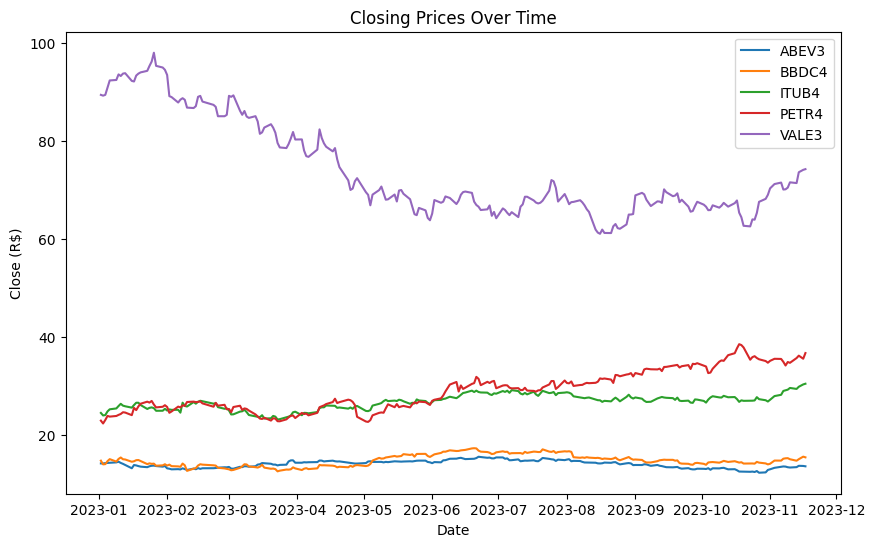

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for ticker in ds['ticker'].unique():
    subset = ds[ds['ticker'] == ticker]
    plt.plot(subset['date'], subset['close'], label=ticker)

plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close (R$)")
plt.legend()
plt.show()


## Returns & volatility

In [59]:
# Daily returns
ds = ds.sort_values(['ticker', 'date'])
ds['return'] = ds.groupby('ticker')['close'].pct_change()

In [60]:
ds.groupby('ticker')['return'].describe()

,count,mean,std,min,25%,50%,75%,max
ticker,,,,,,,,
ABEV3,219.0,-0.000110,0.012993,-0.048991,-0.006964,-0.000687,0.005835,0.050000
BBDC4,219.0,0.000394,0.019404,-0.081884,-0.010144,0.000606,0.011148,0.052352
ITUB4,219.0,0.001111,0.015329,-0.039352,-0.009403,0.000401,0.011431,0.082688
PETR4,219.0,0.002399,0.022171,-0.091954,-0.010244,0.002994,0.015679,0.061564
VALE3,219.0,-0.000695,0.017574,-0.055106,-0.011433,-0.000739,0.009274,0.058543


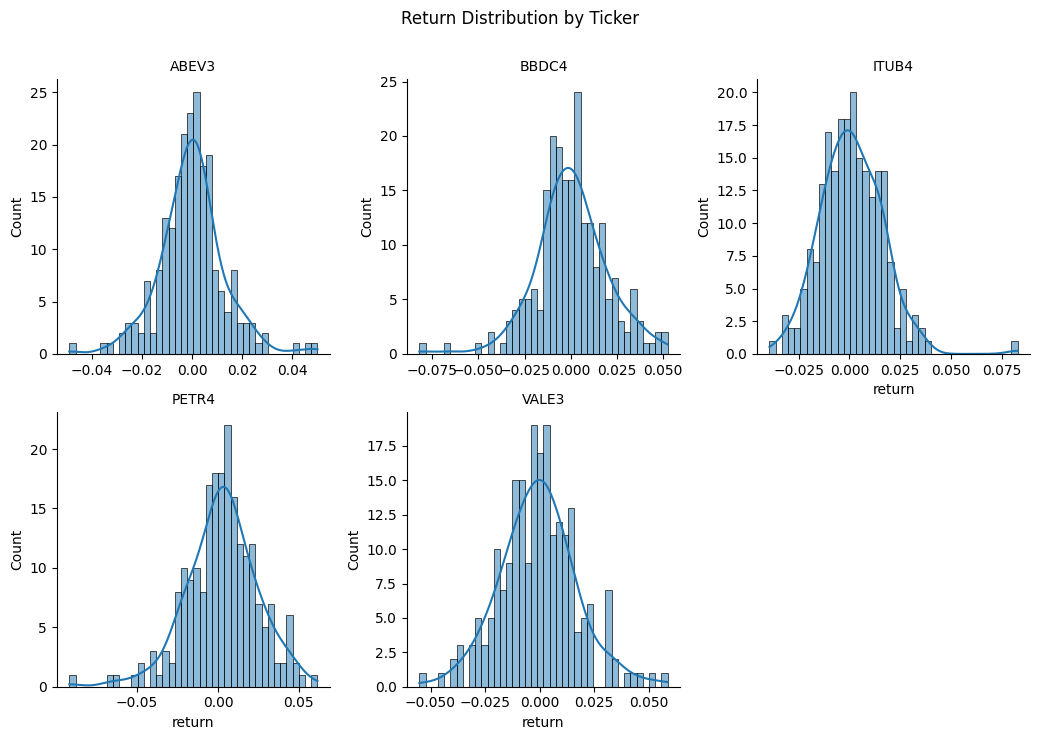

In [62]:
import seaborn as sns

g = sns.FacetGrid(ds, col="ticker", col_wrap=3, height=3.5, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="return", bins=40, kde=True)
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Return Distribution by Ticker", y=1.05)
plt.show()


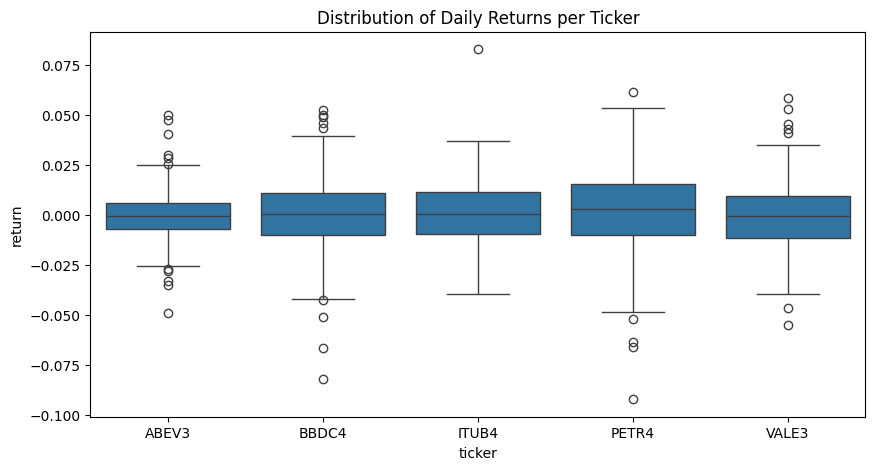

In [63]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=ds, x='ticker', y='return')
plt.title("Distribution of Daily Returns per Ticker")
plt.show()


We could consider the data outside the boxplot outliers, but because this is financial return it is normal to have some small daily outliers. We will interpret them as a volatility events and not data errors.

ticker
PETR4    0.022171
BBDC4    0.019404
VALE3    0.017574
ITUB4    0.015329
ABEV3    0.012993
Name: return, dtype: float64


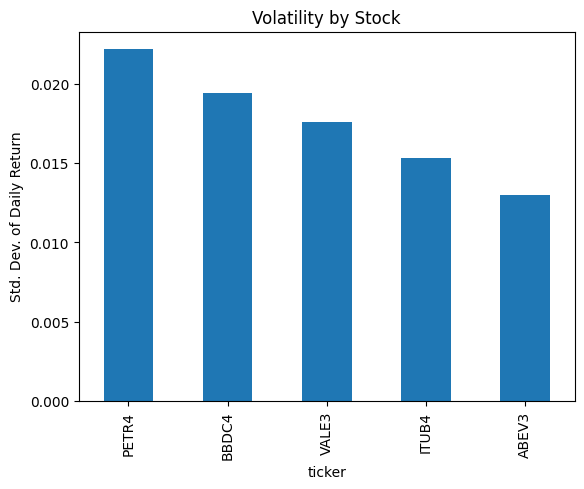

In [65]:
# volatility per ticker
volatility = ds.groupby('ticker')['return'].std().sort_values(ascending=False)
print(volatility)
volatility.plot(kind='bar', title='Volatility by Stock')
plt.ylabel('Std. Dev. of Daily Return')
plt.show()

PETR4 (Petrobras) is the most volatile here, price moves the most from day to day.
ABEV3 (Ambev) is the most stable, price moves less day to day.

Among the analyzed B3 tickers, PETR4 exhibited the highest daily volatility (2.2%) and the largest range of returns, consistent with its sensitivity to oil price movements. Conversely, ABEV3 showed the lowest volatility (1.3%), reflecting its defensive nature. Average daily returns were modest across all stocks, ranging from -0.07% (VALE3) to +0.24% (PETR4)

## Trading activity

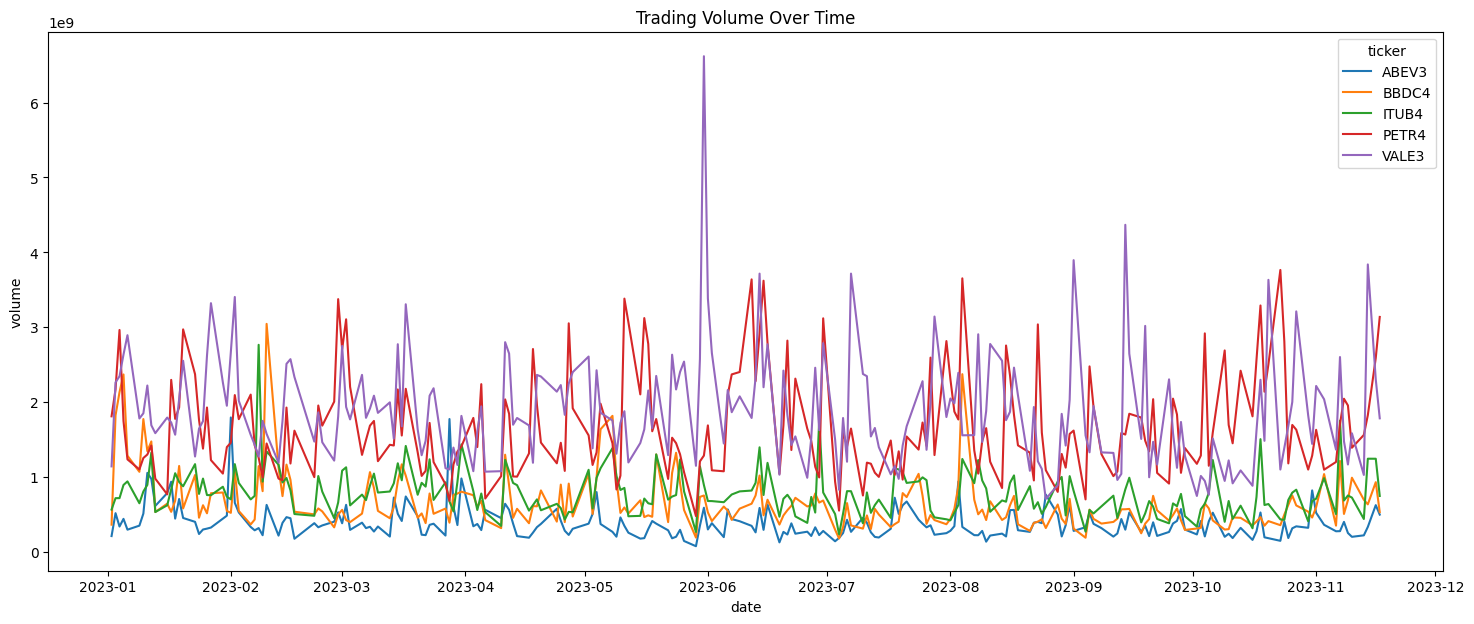

In [41]:
# Daily volume evolution
plt.figure(figsize=(18, 7))
sns.lineplot(data=ds, x='date', y='volume', hue='ticker')
plt.title("Trading Volume Over Time")
plt.show()


ticker
ABEV3    8.578283e+10
BBDC4    1.459094e+11
ITUB4    1.730069e+11
PETR4    3.712561e+11
VALE3    4.155220e+11
Name: volume, dtype: float64


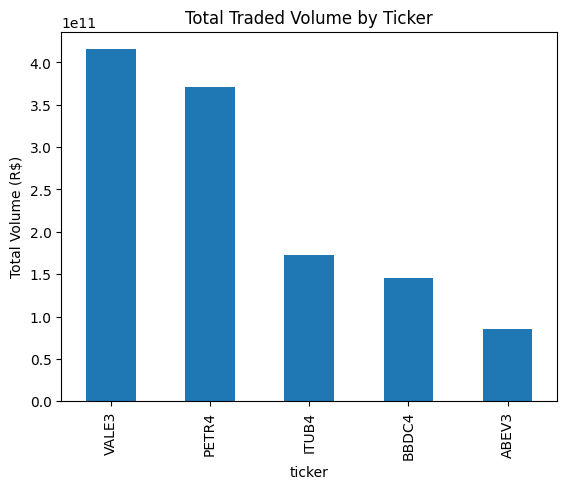

In [71]:
# Share of total volume
ds.groupby('ticker')['volume'].sum().sort_values(ascending=False).plot(kind='bar')
print(ds.groupby('ticker')['volume'].sum())
plt.title("Total Traded Volume by Ticker")
plt.ylabel("Total Volume (R$)")
plt.show()

In [69]:
# In percentage
vol_share = ds.groupby('ticker')['volume'].sum()
vol_share = vol_share / vol_share.sum() * 100
vol_share

ticker
ABEV3     7.199703
BBDC4    12.246093
ITUB4    14.520369
PETR4    31.159312
VALE3    34.874523
Name: volume, dtype: float64

It shows how much money changes hands for each stock, the liquidity. The higher the total volume, the more actively traded the stock is.
Stocks like VALE3 and PETR4 dominate total trading activity, highly liquid and usually large-cap. ABEV3, while big, trades less frequently, relatively lower liquidity.

## Correlation between tickers

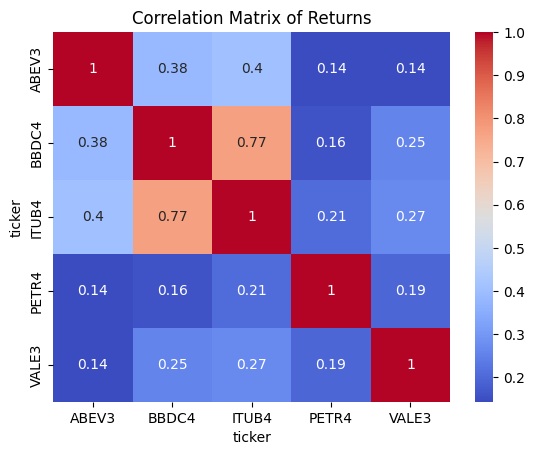

In [43]:
# Correlations between assets
returns_pivot = ds.pivot(index='date', columns='ticker', values='return')
sns.heatmap(returns_pivot.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Returns")
plt.show()

BBDC4 and ITUB4 are highly correlated, reflecting their exposure to similar market and macroeconomic conditions, both are banks. In contrast, PETR4 (Petrobras) and VALE3 (Vale) show weak correlations with the financial and consumer sectors (0.14–0.27), suggesting their performance is primarily driven by external commodity and energy price dynamics. ABEV3 (Ambev) maintains moderate correlation with the banks (≈0.4), consistent with its position as a domestic consumption-driven company.

                    close
close            1.000000
avg              0.999956
min              0.999884
max              0.999876
open             0.999692
volume           0.539041
quantity        -0.336459
marketType            NaN
bdiCode               NaN
optionPrice           NaN
priceCorrection       NaN
paperDueDate          NaN
quoteFactor           NaN


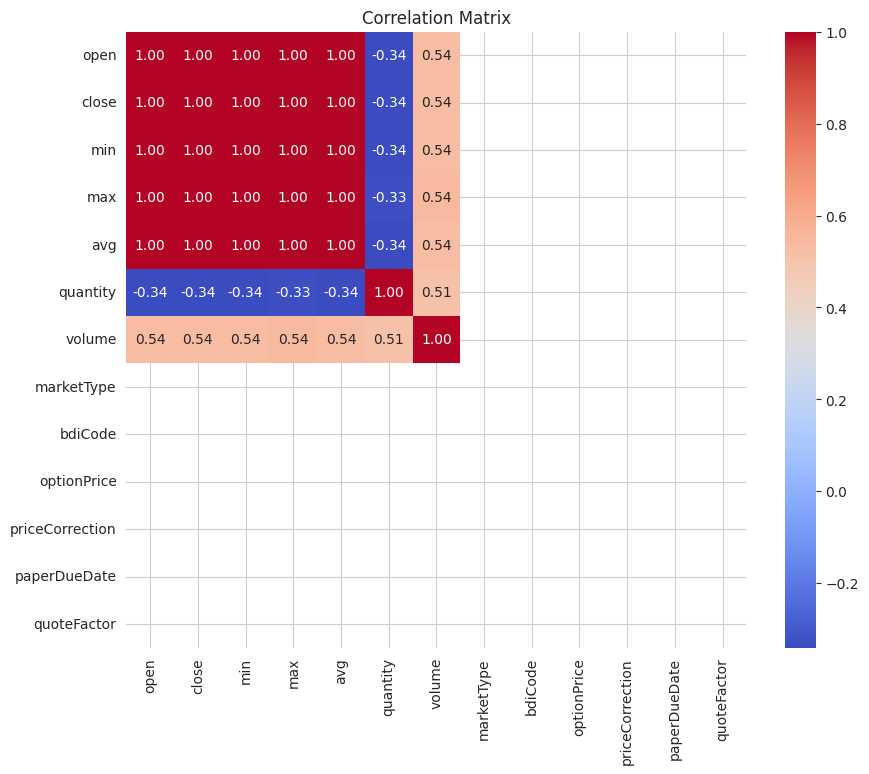

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ds = pd.read_csv('../data/2023_selected_stocks.csv', low_memory=False)
ds['date'] = pd.to_datetime(ds['date'])

# Assuming ds is your dataframe
numeric_cols = ds.select_dtypes(include='number').columns
corr_matrix = ds[numeric_cols].corr()
close_corr = corr_matrix[['close']].sort_values(by='close', ascending=False)
print(close_corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Price features (avg, min, max, open) are almost perfectly correlated with close. That’s normal because these are all derived from the same price data. Volume/quantity show weaker correlations, they may influence price movements but aren’t deterministically tied to close. Non-numeric features are ignored in correlation unless preprocessed.

# Conclusion

After reviewing the dataset’s structure and field definitions, we decided to remove several columns that do not provide meaningful information for our analysis of stock price behavior. The variables currency, marketType, bdiCode, prazoT, paperSpecification, optionPrice, priceCorrection, paperDueDate, and quoteFactor were either constant across all observations, contained redundant information already represented by the ticker, or were relevant only to other types of financial instruments (e.g., options or bonds).

Since our project focuses on analyzing the evolution of prices, returns, and trading volumes of equities traded on B3, these columns do not contribute to the explanatory power of our dataset and were therefore removed to simplify the analysis and reduce noise.

In [73]:
# Dropping tables
ds.drop(columns=['currency','marketType','bdiCode','prazoT','paperSpecification','optionPrice', 'priceCorrection','paperDueDate', 'quoteFactor'], inplace=True)

In [74]:
ds.head()

,date,ticker,name,open,close,min,max,avg,quantity,volume,return
0,2023-01-02,ABEV3,AMBEVS/A,14.40,14.19,14.02,14.45,14.19,14995900,212856851.0,NaN
7,2023-01-03,ABEV3,AMBEVS/A,14.16,14.17,14.11,14.39,14.26,36363800,518560034.0,-0.001409
10,2023-01-04,ABEV3,AMBEVS/A,14.28,14.25,14.08,14.47,14.30,23791800,340356296.0,0.005646
16,2023-01-05,ABEV3,AMBEVS/A,14.27,14.29,14.14,14.41,14.26,31031500,442535690.0,0.002807
20,2023-01-06,ABEV3,AMBEVS/A,14.30,14.32,14.16,14.36,14.27,20889800,298298670.0,0.002099
